In [1]:
library(phyloseq)
library(gridExtra)
library(ggplot2)
library(reshape)
library(RColorBrewer) 
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [9]:
mytheme = theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.title=element_blank(), legend.key=element_blank())

In [10]:
getFDR = function(import_file) {
    import = readRDS(import_file)
    p = import$p
    p_shuff = melt(import$p_shuff)$val
    ps = import$ps
    p_cutoff = p
    n_sig = c(0,sapply(p_cutoff, function(x) {sum(p<=x)}))
    fdr = c(0,sapply(p_cutoff, function(x) {mean(p_shuff<=x) / mean(p<=x)}))   
    return(list(n_sig=n_sig, fdr=fdr, p_cutoff = c(0,p_cutoff)))
}

getFDRSmall = function(import_file) {
    import = readRDS(import_file)
    p = sort(import$p)[1:1000]
    p_shuff = apply(import$p_shuff, 1, function(x){sort(x)[1:1000]})
    ps = import$ps
    p_cutoff = p
    n_sig = c(0,sapply(p_cutoff, function(x) {sum(p<=x)}))
    fdr = c(0,sapply(p_cutoff, function(x) {mean(p_shuff<=x) / mean(p<=x)}))    
    return(list(n_sig=n_sig, fdr=fdr, p_cutoff = c(0,p_cutoff)))
}

# Autism

In [6]:
fdr = getFDRSmall("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/Class.rds")
fdr_df = data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type='ASV')


In [7]:
study='yogurt'
fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/", study, "/p_vals/ASVs.rds"))
fdr_df = data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type='ASV')

for (tax_level in c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')) {
    message(tax_level)
    fdr = getFDR(paste0("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/", study, "/p_vals/", tax_level, '.rds'))
    fdr_df = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type=tax_level))
}
for (type in c('DECIPHER_1', 'DECIPHER_2', 'Muscle_1', 'Muscle_2','ClustalOmega_1', 'ClustalOmega_2', 'ClustalW_1', 'ClustalW_2')) {
    fdr = getFDRSmall(paste0("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/", study, "/p_vals/", type ,".rds"))
    fdr_df  = rbind(fdr_df, data.frame(fdr=fdr$fdr, n_sig=fdr$n_sig, type=type))
}


Phylum
Using  as id variables
Class
Using  as id variables
Order
Using  as id variables
Family
Using  as id variables
Genus
Using  as id variables
Species
Using  as id variables


In [8]:
fdr_df_baseline = fdr_df[fdr_df$type %in% c('Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'DECIPHER_2'),]
fdr_df_alg = fdr_df[fdr_df$type %in% c('DECIPHER_1', 'DECIPHER_2', 'Muscle_1', 'Muscle_2','ClustalOmega_1', 'ClustalOmega_2', 'ClustalW_1', 'ClustalW_2'),]

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 599 rows containing missing values (geom_path).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 3973 rows containing missing values (geom_path).”

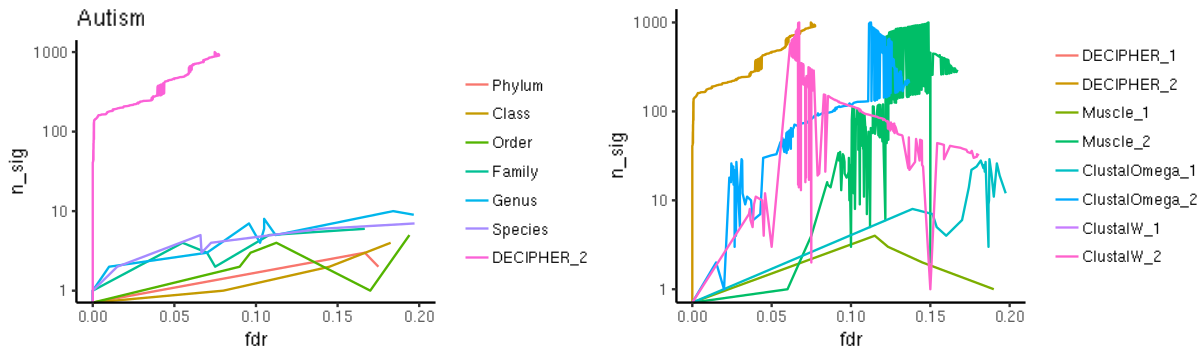

In [11]:
mytheme = theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"), legend.title=element_blank(), legend.key=element_blank())
options(repr.plot.height=3, repr.plot.width=10)
p1 = ggplot(fdr_df_baseline) + geom_line(aes(x=fdr,y=n_sig, color=type)) + xlim(0,.2) + scale_y_log10() + ggtitle('Autism') + mytheme
p2 = ggplot(fdr_df_alg) + geom_line(aes(x=fdr,y=n_sig, color=type)) + xlim(0,.2) + scale_y_log10() + mytheme
grid.arrange(p1, p2, nrow=1)



In [2]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")
var_names = a$var_names[order(a$p)[1:1000],]
splits = strsplit(as.character(var_names[,1]), split = "\\.")
pos1=sapply(splits, function(x) as.integer(x[1]))
bases1=sapply(splits, function(x) (x[2]))
splits = strsplit(as.character(var_names[,2]), split = "\\.")
pos2=sapply(splits, function(x) as.integer(x[1]))
bases2=sapply(splits, function(x) (x[2]))                  

t = apply(a$seq_df[,pos1], 1, function(x) x==bases1) & apply(a$seq_df[,pos2], 1, function(x) x==bases2)
t[t==T]=1
t[t==F]=0
t = t[rowSums(t)!=0,]
t = t[,colSums(t)!=0]

In [ ]:
library(RColorBrewer) 
hmcol <- colorRampPalette(brewer.pal(9, "GnBu"))(100)
options(repr.plot.height=100, repr.plot.width=20)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")

In [ ]:
library(RColorBrewer) 

hmcol = colorRampPalette(brewer.pal(9, "GnBu"))(100)
options(repr.plot.height=5, repr.plot.width=5)
options(repr.plot.height=10, repr.plot.width=5)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")
#pdf('/oak/stanford/groups/dpwall/users/briannac/SBBs/results/figures/heatmap_autism.pdf', width=4, height=4)
heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none", labCol = F, labRow = F, margins = c(1,1), main = "Autism") + mytheme
#dev.off()

In [ ]:
options(repr.plot.height=10, repr.plot.width=10)
p_heatmap=heatmap.2(t,  col=hmcol, trace='none', key=F, dendrogram = "none")

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

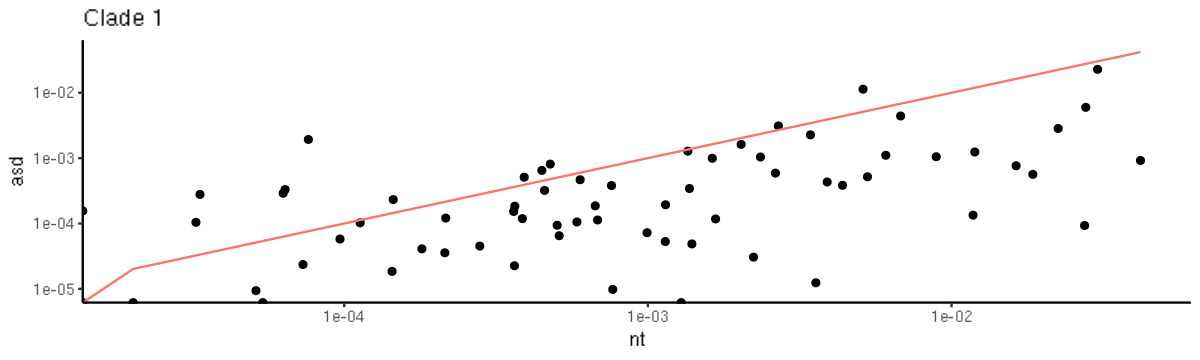

In [232]:
a_ps = transform_sample_counts(a$ps, function(x) {x/sum(x)})

df = data.frame(asd_age=sample_data(a_ps)[sample_data(a_ps)$phenotype=='A', 'age'], asd=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='A', which(tax_table(a_ps)[,'Genus']=='Veillonella')]),
           nt_age=sample_data(a_ps)[sample_data(a_ps)$phenotype=='N', 'age'], nt=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='N', which(tax_table(a_ps)[,'Genus']=='Veillonella')]))
p1 = ggplot(df[df$age > df$age.1,]) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")
p1

In [225]:
df=data.frame(l=sample_data(a_ps)$'Lactose.intolerance..Biospecimen..1', count=rowSums(otu_table(a_ps)[, which(tax_table(a_ps)[,'Genus']=='Veillonella')]))

,l,count
001_A_1,False,9.811713e-06
001_N_1,False,7.661951e-04
002_A_2,False,1.573362e-03
002_N_2,False,1.809825e-03
004_A_2,False,1.861801e-04
004_N_2,False,6.708947e-04
005_A_3,False,6.482246e-04
005_N_3,False,4.475898e-04
009_A_2,False,4.411572e-04
009_N_2,False,1.378551e-04


[1] "Host.Name"                                                                 
  [2] "host"                                                                      
  [3] "family"                                                                    
  [4] "age"                                                                       
  [5] "antibiotics"                                                               
  [6] "sick"                                                                      
  [7] "bowel_issues"                                                              
  [8] "batch"                                                                     
  [9] "timepoint"                                                                 
 [10] "phenotype"                                                                 
 [11] "race"                                                                      
 [12] "Biospecimen.Barcode"                                                       
 [13] "SG.Project.ID"                                                             
 [14] "Host.ID"                                                                   
 [15] "Host.Name.1"                                                               
 [16] "Biospecimen.ID"                                                            
 [17] "Biospecimen.Name"                                                          
 [18] "Biospecimen.Description"                                                   
 [19] "Biospecimen.mass"                                                          
 [20] "Biospecimen.mass.unit"                                                     
 [21] "Biospecimen.Date.Collected"                                                
 [22] "Within.study.sampling.date..Biospecimen."                                  
 [23] "Family.group.ID..Biospecimen."                                             
 [24] "Natural.sibling.included.in.present.study..Biospecimen."                   
 [25] "Biospecimen.type..Biospecimen."                                            
 [26] "Specimen.preservation.method..Biospecimen."                                
 [27] "Specimen.status.upon.receipt..Biospecimen."                                
 [28] "Host.disease.status..Biospecimen."                                         
 [29] "Annual.household.income..Biospecimen."                                     
 [30] "Source.of.drinking.water..Biospecimen."                                    
 [31] "Number.of.roommates..Biospecimen."                                         
 [32] "Pets.in.home..Biospecimen."                                                
 [33] "Pet.dog..Biospecimen."                                                     
 [34] "Pet.cat..Biospecimen."                                                     
 [35] "Pet.fish..Biospecimen."                                                    
 [36] "Pet.bird..Biospecimen."                                                    
 [37] "Pet.horse..Biospecimen."                                                   
 [38] "Pet.reptile..Biospecimen."                                                 
 [39] "Small.pet.rodent..Biospecimen."                                            
 [40] "Number.of.pet.dogs..Biospecimen."                                          
 [41] "Number.of.pet.cats..Biospecimen."                                          
 [42] "Number.of.pet.fish..Biospecimen."                                          
 [43] "Number.of.pet.birds..Biospecimen."                                         
 [44] "Number.of.pet.horses..Biospecimen."                                        
 [45] "Number.of.pet.reptiles..Biospecimen."                                      
 [46] "Indoors.pet..Biospecimen."                                                 
 [47] "Outdoors.pet..Biospecimen."                                                
 [48] "Anti.infective..Biospecimen."                                              
 [49] "Minimum.tim

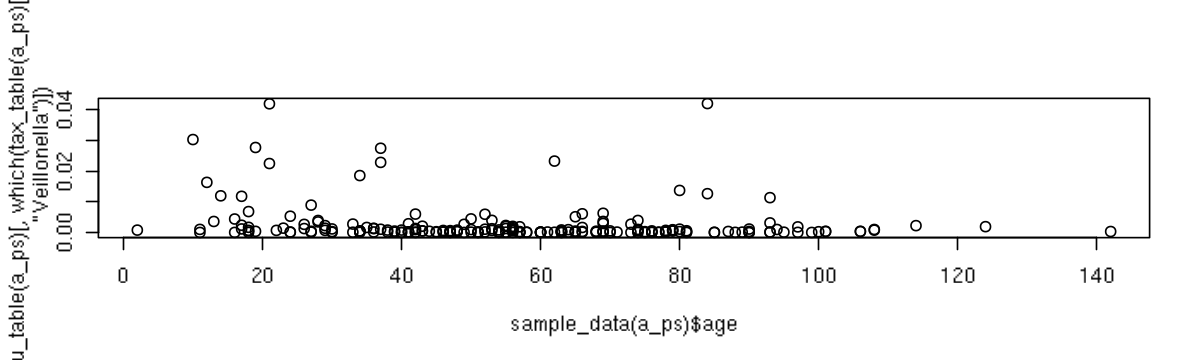

In [214]:
plot(sample_data(a_ps)$age, rowSums(otu_table(a_ps)[, which(tax_table(a_ps)[,'Genus']=='Veillonella')]))
colnames(sample_data(a_ps))

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”


Veillonella 
         27 


Parabacteroides 
            112 


Blautia 
    197 

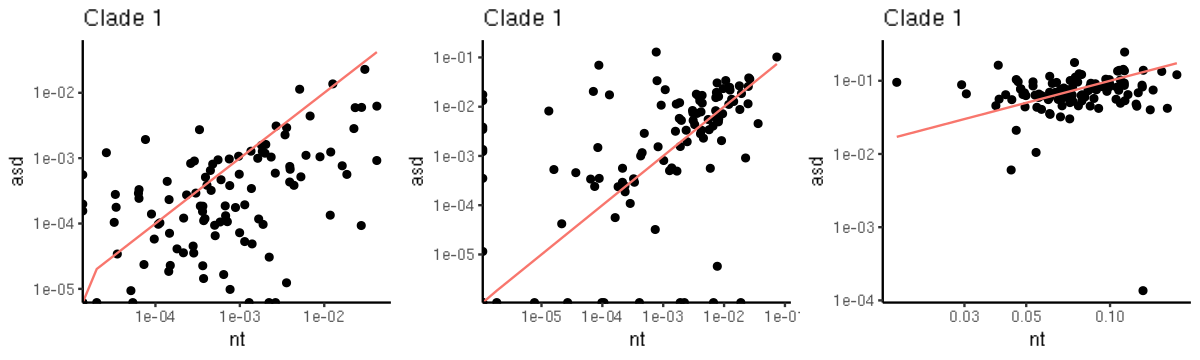

In [11]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")
a_ps = transform_sample_counts(a$ps, function(x) {x/sum(x)})

df = data.frame(asd=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='A', which(tax_table(a_ps)[,'Genus']=='Veillonella')]),
           nt=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='N', which(tax_table(a_ps)[,'Genus']=='Veillonella')]))
p1 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = data.frame(asd=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='A', which(tax_table(a_ps)[,'Genus']=='Parabacteroides')]),
           nt=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='N', which(tax_table(a_ps)[,'Genus']=='Parabacteroides')]))
p2 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = data.frame(asd=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='A', which(tax_table(a_ps)[,'Genus']=='Blautia')]),
           nt=rowSums(otu_table(a_ps)[sample_data(a_ps)$phenotype=='N', which(tax_table(a_ps)[,'Genus']=='Blautia')]))
p3 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

options(repr.plot.height=3, repr.plot.width=10)

grid.arrange(p1, p2, p3, nrow=1)

table(tax_table(a$ps)[which(tax_table(a$ps)[,'Genus']=='Veillonella'),'Genus'])
table(tax_table(a$ps)[which(tax_table(a$ps)[,'Genus']=='Parabacteroides'),'Genus'])
table(tax_table(a$ps)[which(tax_table(a$ps)[,'Genus']=='Blautia'),'Genus'])

In [15]:
n = 200
cors_person=cor(a$person_variants[,order(a$p)[1:n]], method = 'pearson')
cors_taxa=sapply(1:n, function(x) sapply(1:n, function(y) length(intersect(which(t[x,]==1), which(t[y,]==1)))))
cors_person[which(rowSums(t[1:n,]==1)>1000), ] = 0
cors_person[, which(rowSums(t[1:n,]==1)>1000)] = 0


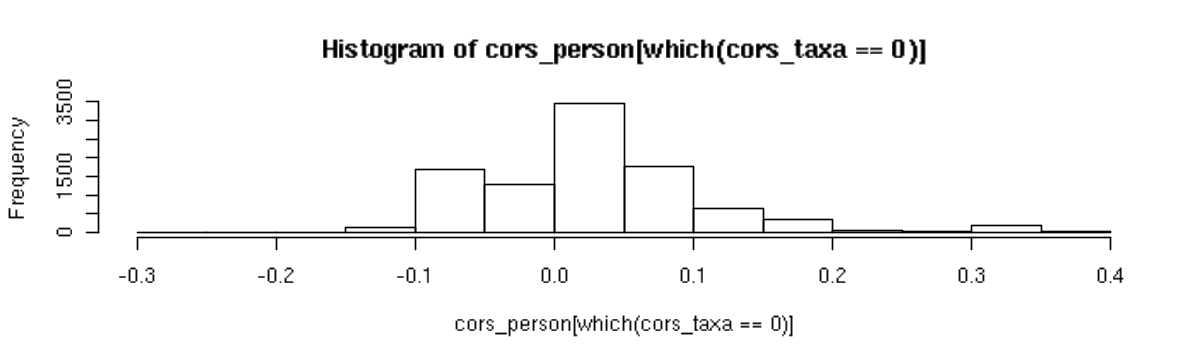

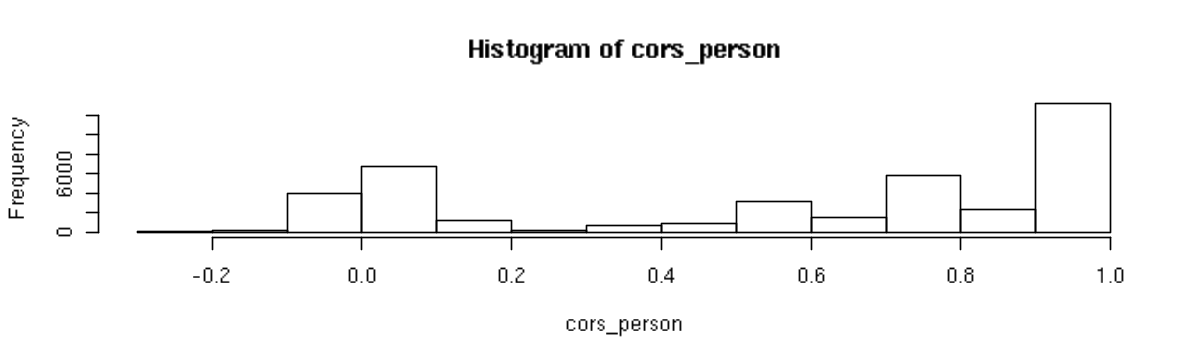

In [16]:
hist(cors_person[which(cors_taxa==0)])
hist(cors_person)

row,col
187,178
178,187


row,col



Bacteroidetes    Firmicutes 
          131             2 


           Actinobacteria             Bacteroidetes Cyanobacteria/Chloroplast 
                      110                        13                        13 
               Firmicutes            Proteobacteria 
                      316                        18 

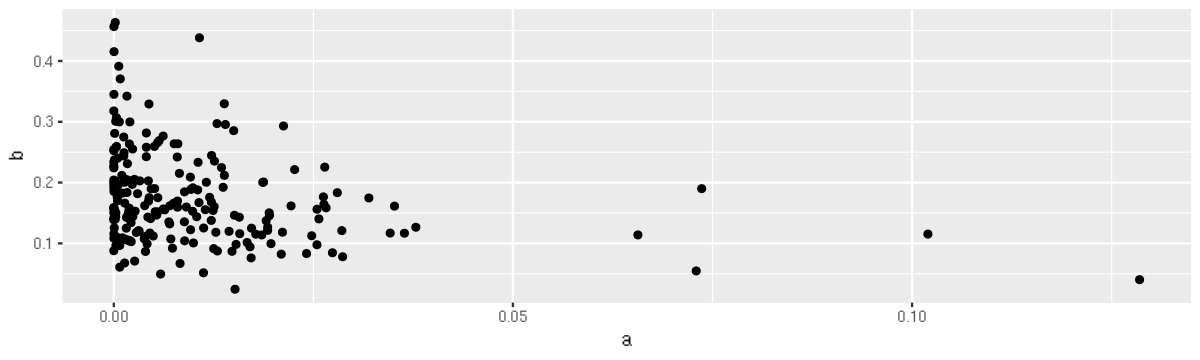

In [17]:
which(cors_person==min(cors_person), arr.ind = T)
#head(which(cors_person<-.2 & cors_taxa==0, arr.ind = T))
head(which((cors_person>.4) & (cors_taxa==0), arr.ind = T))
#head(which(cors_person< -.25, arr.ind = T))

n1=187
n2=178
ggplot(data.frame(a=a$person_variants[,order(a$p)[n1]], b=a$person_variants[,order(a$p)[n2]])) + geom_point(aes(a,b))#+ scale_x_log10() + scale_y_log10()
table(tax_table(a$ps)[names(which(t[n1,]==1)), 'Phylum'])
table(tax_table(a$ps)[names(which(t[n2,]==1)), 'Phylum'])


In [167]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/Genus.rds")
sum(a$p*length(a$p)<.06)
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")
sum(a$p*length(a$p)<.05)


[1] 1

[1] 32

In [176]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/Genus.rds")
#tax_table(a$ps)[which(a$p*length(a$p)<.05),]

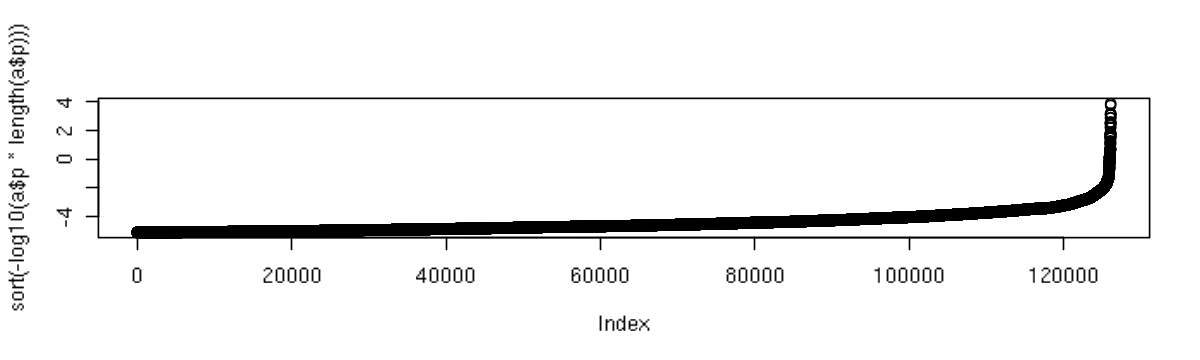

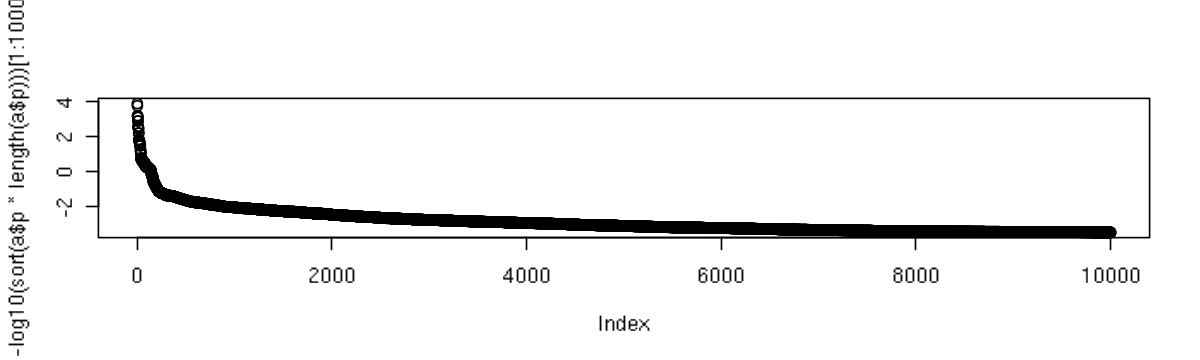

In [185]:
plot(sort(-log10(a$p*length(a$p))))
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")
plot(-log10(sort(a$p*length(a$p)))[1:10000])

In [141]:
pca = prcomp(a$person_variants[,order(a$p)[1:100]], center = T, scale=T)
#pca = prcomp(otu_table(a$ps), center = T, scale=T)
#summary(pca)

In [123]:
#pca = prcomp(a$person_variants[,sample(1:ncol(a$person_variants), 5000, replace=F)], center = T, scale=T)
#summary(pca)

In [136]:
mean(abs(pca$x[c(T,F),2]-pca$x[c(F,T),2]))
mean(abs(pca$x[sample(1:nrow(pca$x),300, replace = T) ,2]-pca$x[sample(1:nrow(pca$x),300, replace = T) ,2]))

[1] 1.368978

[1] 1.673055

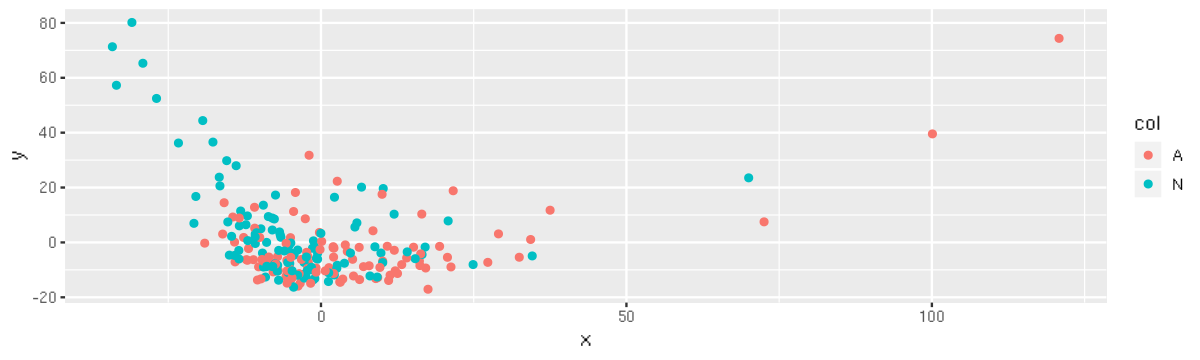

In [140]:
ggplot(data.frame(x=pca$x[,1], y=pca$x[,2], col=sample_data(a$ps)$phenotype)) + geom_point(aes(x,y,col=col))

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”


                 Actinomycetaceae                Bifidobacteriaceae 
                               25                                26 
                 Clostridiaceae_1  Clostridiales_Incertae_Sedis_XII 
                               10                                 1 
Clostridiales_Incertae_Sedis_XIII                 Coriobacteriaceae 
                                7                                29 
               Corynebacteriaceae                    Eubacteriaceae 
                               12                                 3 
                  Lachnospiraceae                 Microbacteriaceae 
                              225                                 1 
                   Micrococcaceae                   Pasteurellaceae 
                               12                                17 
                   Prevotellaceae                   Ruminococcaceae 
                               13                                 3 
                Sanguibacteraceae


       Bacteroidaceae   Erysipelotrichaceae Peptostreptococcaceae 
                    1                     1                     1 
   Porphyromonadaceae        Prevotellaceae 
                  119                    11 


            Actinobaculum               Actinomyces              Actinotignum 
                        1                        12                         1 
              Akkermansia               Allisonella            Alloprevotella 
                        3                         2                         2 
            Alloscardovia              Anaerococcus              Arthrobacter 
                        1                        10                         1 
          Bifidobacterium                   Blautia Clostridium_sensu_stricto 
                       21                        85                         9 
         Clostridium_XlVa               Coprococcus           Corynebacterium 
                        3                         1                        12 
           Curtobacterium               Dermacoccus                     Dorea 
                        1                         1                         1 
            Enterorhabdus               Eubacterium

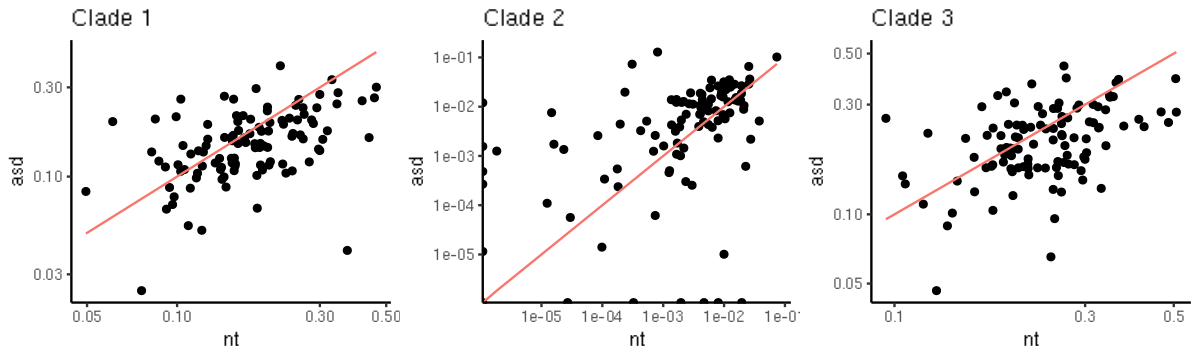

In [12]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")

df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[178]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[178]])
p1 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[187]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[187]])
p2 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 2')+ theme(legend.position="none")


df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[281]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[281]])
p3 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 3') + theme(legend.position="none")

options(repr.plot.height=3, repr.plot.width=10)

grid.arrange(p1, p2, p3, nrow=1)

table(tax_table(a$ps)[names(which(t[178,]==1)), 'Family'])
table(tax_table(a$ps)[names(which(t[187,]==1)), 'Family'])
table(tax_table(a$ps)[names(which(t[281,]==1)), 'Genus'])

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”


       Anaerosinus    Parabacteroides Pseudobutyrivibrio          Rhizobium 
                 1                  1                  1                  1 
       Veillonella 
                19 


     Actinomyces      Bacteroides    Butyricimonas   Clostridium_IV 
               1                1                1                4 
     Lactococcus Methylobacterium  Parabacteroides    Peptoniphilus 
               2                1              110                4 
   Porphyromonas 
               2 


            Actinobaculum               Actinomyces              Actinotignum 
                        1                        12                         1 
              Akkermansia               Allisonella            Alloprevotella 
                        3                         2                         2 
            Alloscardovia              Anaerococcus              Arthrobacter 
                        1                        10                         1 
          Bifidobacterium                   Blautia Clostridium_sensu_stricto 
                       21                        85                         9 
         Clostridium_XlVa               Coprococcus           Corynebacterium 
                        3                         1                        12 
           Curtobacterium               Dermacoccus                     Dorea 
                        1                         1                         1 
            Enterorhabdus               Eubacterium

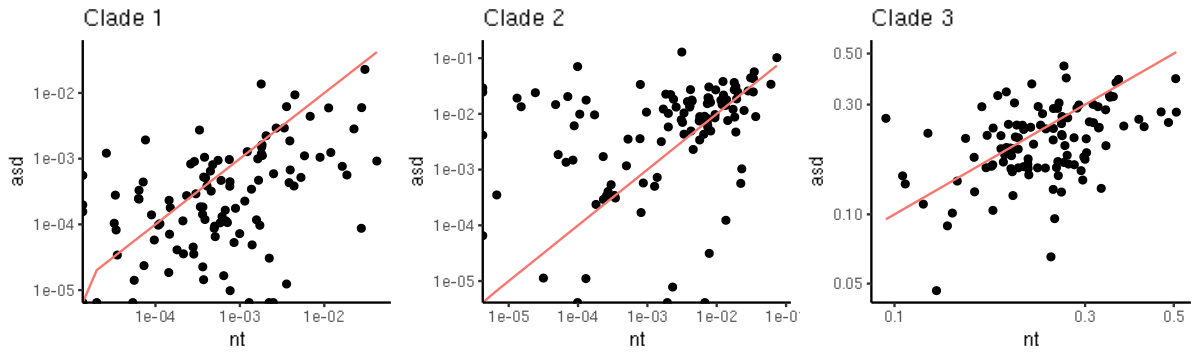

In [95]:
a = readRDS("/oak/stanford/groups/dpwall/users/briannac/SBBs/results/yogurt/p_vals/DECIPHER_2.rds")

df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[93]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[93]])
p1 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 1')+ theme(legend.position="none")

df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[97]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[97]])
p2 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 2')+ theme(legend.position="none")


df = data.frame(asd=a$person_variants[sample_data(a$ps)$phenotype=='A', order(a$p)[281]],
           nt=a$person_variants[sample_data(a$ps)$phenotype=='N', order(a$p)[281]])
p3 = ggplot(df) + geom_point(aes(nt, asd)) + geom_line(aes(nt, nt, color='red')) + scale_x_log10() + scale_y_log10() + mytheme + ggtitle('Clade 3') + theme(legend.position="none")

options(repr.plot.height=3, repr.plot.width=10)

grid.arrange(p1, p2, p3, nrow=1)

table(tax_table(a$ps)[names(which(t[93,]==1)), 'Genus'])
table(tax_table(a$ps)[names(which(t[97,]==1)), 'Genus'])
table(tax_table(a$ps)[names(which(t[281,]==1)), 'Genus'])